# STAT207 Mini-Project #2 - USED FIAT 500 PRICES


ANDREA LISCI

In [1]:
#Imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

## 1. Introduction

### Fiat is one of the most famous automotive companies in the world. The most iconic car produced by this company is the famous Fiat 500, a car known for its particular design, but above all for its incredible efficiency and convenience. It's a relatively small car with remarkable performances and longevity. 

### With this project I intend to build a predictive model that will effectively predict the selling price for used Fiat 500 cars for new datasets. With this goal in mind (predict the variable price) I will use this explanatory variables:
* model: the model of the car
* engine power: number of horse power of the engine
* transmission: if the car has manual of automatic shift
* age in days: the age of the car in number of days (from the time the dataset has been created)
* km: number of kilometers of the car
* previous owners: number of previous owners
### We also might want to have some useful insights about the relationship between this variables.

### This type of car is widely known and it's possibly one of the most famous car model that has ever been produced, it's famous for its remarkable performances, despite the generally low price, it could be seen as a great option to have as a first car. When looking for a car to buy, we start by selecting particular characteristics. The model might be useful in telling us an average price of a Fiat 500 with our preferred characteristics, so someone's who's looking for his first car might find this project useful.

## 2. Dataset Discussion

In [2]:
df = pd.read_csv('Used_fiat_500_in_Italy_dataset.csv')
df.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


### Number of rows in the dataset:

In [3]:
df.shape[0]

380

### This dataframe was downloaded from Kaggle, on October 23 2023. (https://www.kaggle.com/datasets/paolocons/small-dataset-about-used-fiat-500-sold-in-italy/)

## 3. Dataset Cleaning

### Before going any further, we need to clean the dataset. I will start by deleting any rows with implicit or explicit missing values (having missing values in a dataset might lead to problems when applying functions to the same dataset):

In [4]:
df.isna().sum()

model              0
engine_power       0
transmission       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [5]:
df.dtypes

model               object
engine_power         int64
transmission        object
age_in_days          int64
km                   int64
previous_owners      int64
lat                float64
lon                float64
price                int64
dtype: object

### From this first analysis there seems to be 0 missing values in the dataset, so I will eliminate 0 rows from it.

### The second step of the data cleaning process involves outliers:

### By deleting outliers we are going to have a cleaner dataframe and less skewed results. However, by dropping outliers we are also dropping rows of valid data in the dataframe.

<Axes: xlabel='age_in_days'>

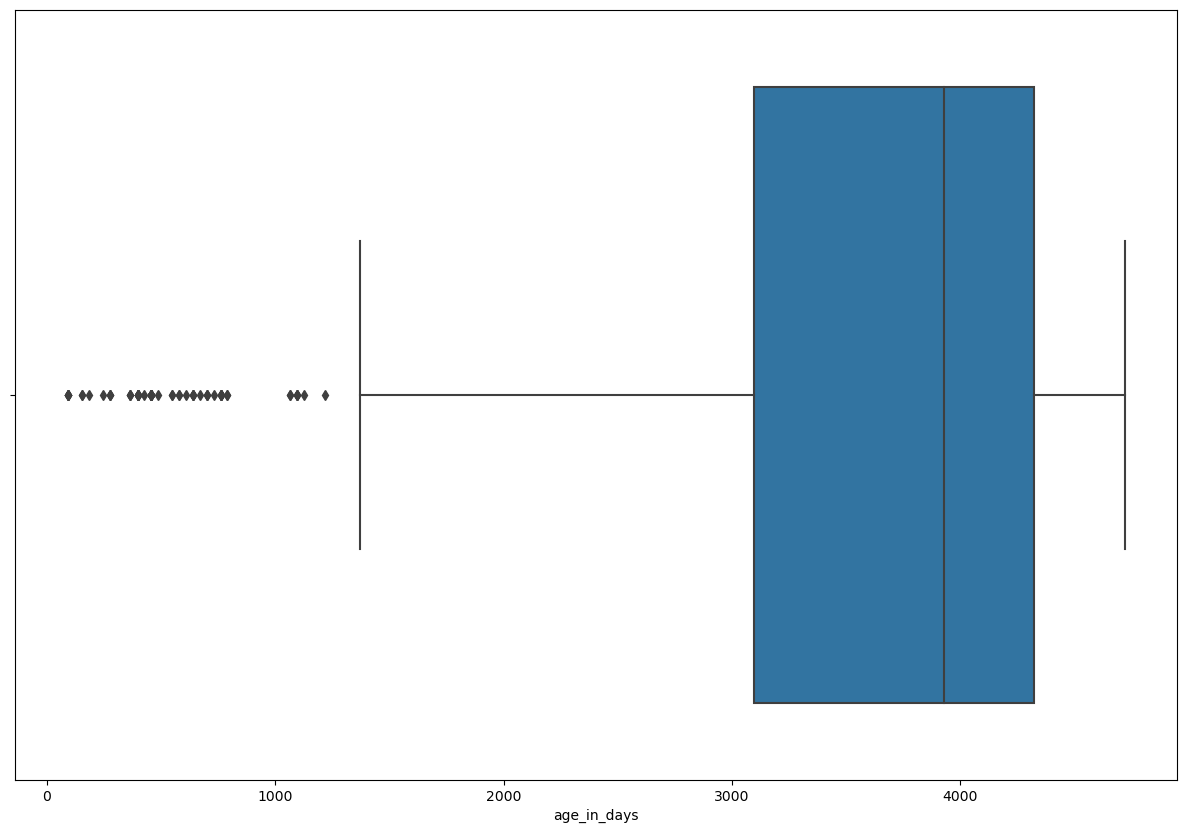

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'age_in_days', data = df)

<Axes: xlabel='km'>

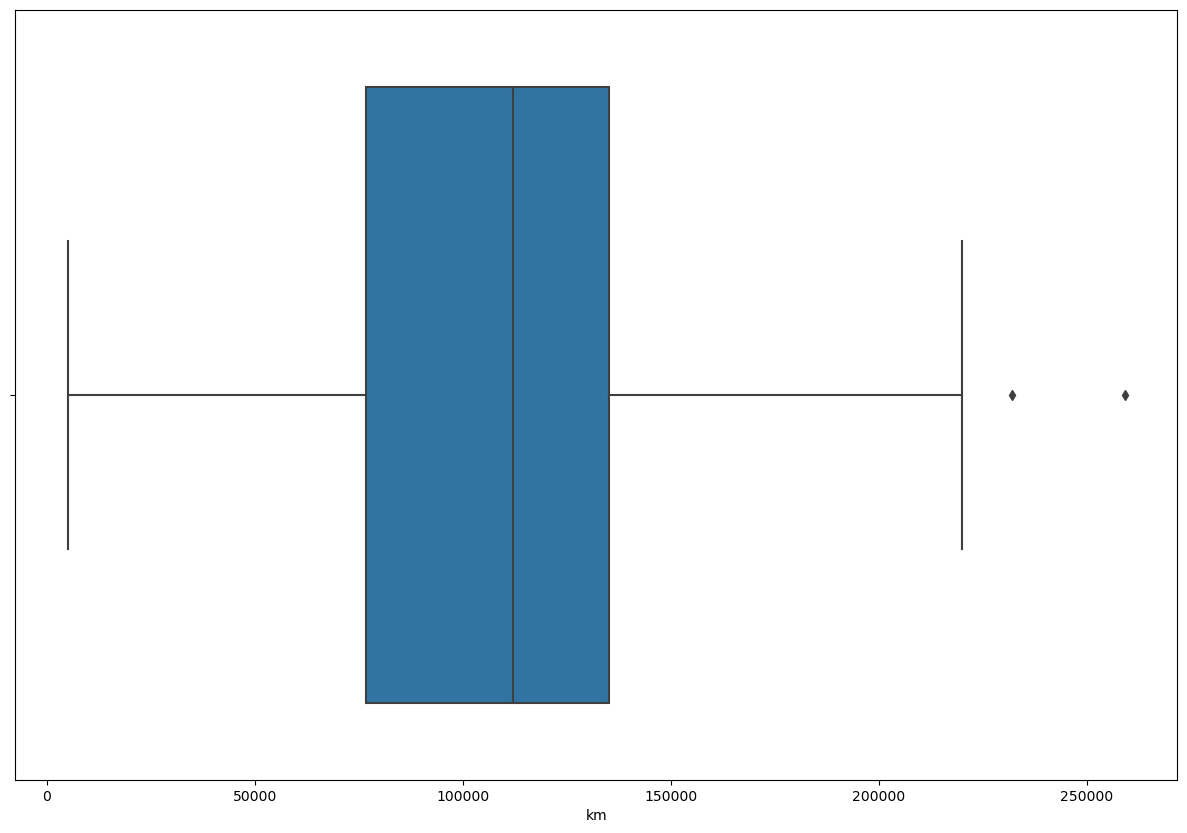

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'km', data = df)

<Axes: xlabel='price'>

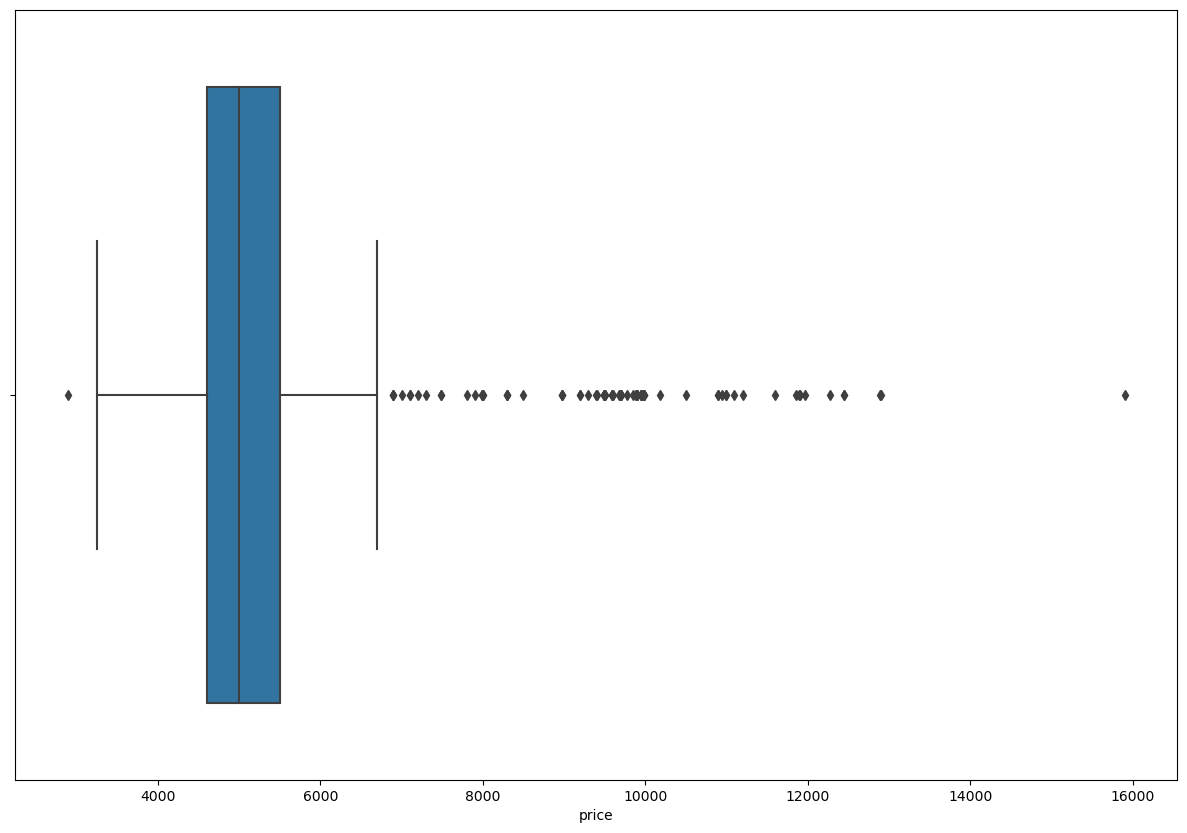

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'price', data = df)

### The variables 'price', 'km', 'age in days' have outliers, for age in days I will delete the values that are less than 1000, for km I will delete the values that are grater than 230000 and for price values grater than 12000.

In [9]:
df2 = df[(df.age_in_days >1000) & (df.km <230000) & (df.price <12000)]
df2

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790
...,...,...,...,...,...,...,...,...,...
375,lounge,69,manual,4474,55976,2,45.610050,9.24234,5500
376,lounge,69,manual,4200,134717,1,44.102020,9.82024,5500
377,lounge,69,manual,3470,113344,1,41.003799,16.87294,5500
378,pop,69,automatic,3712,130000,1,45.810501,8.96474,5500


### I'm also going to take the dataframe's columns that I need for the research:

In [10]:
df_def = df2[['model','engine_power','transmission','age_in_days','km','previous_owners','price']]
df_def

,model,engine_power,transmission,age_in_days,km,previous_owners,price
0,pop,69,manual,4474,56779,2,4490
1,lounge,69,manual,2708,160000,1,4500
2,lounge,69,automatic,3470,170000,2,4500
3,sport,69,manual,3288,132000,2,4700
4,sport,69,manual,3712,124490,2,4790
...,...,...,...,...,...,...,...
375,lounge,69,manual,4474,55976,2,5500
376,lounge,69,manual,4200,134717,1,5500
377,lounge,69,manual,3470,113344,1,5500
378,pop,69,automatic,3712,130000,1,5500


### Number of rows dropped:

In [11]:
n_row = df.shape[0]-df2.shape[0]
n_row

66

## 4. Preliminary Analysis

### In the preliminary analysis I'm going to show the scatterplot for every pair of numerical variables:

<Figure size 1500x1000 with 0 Axes>

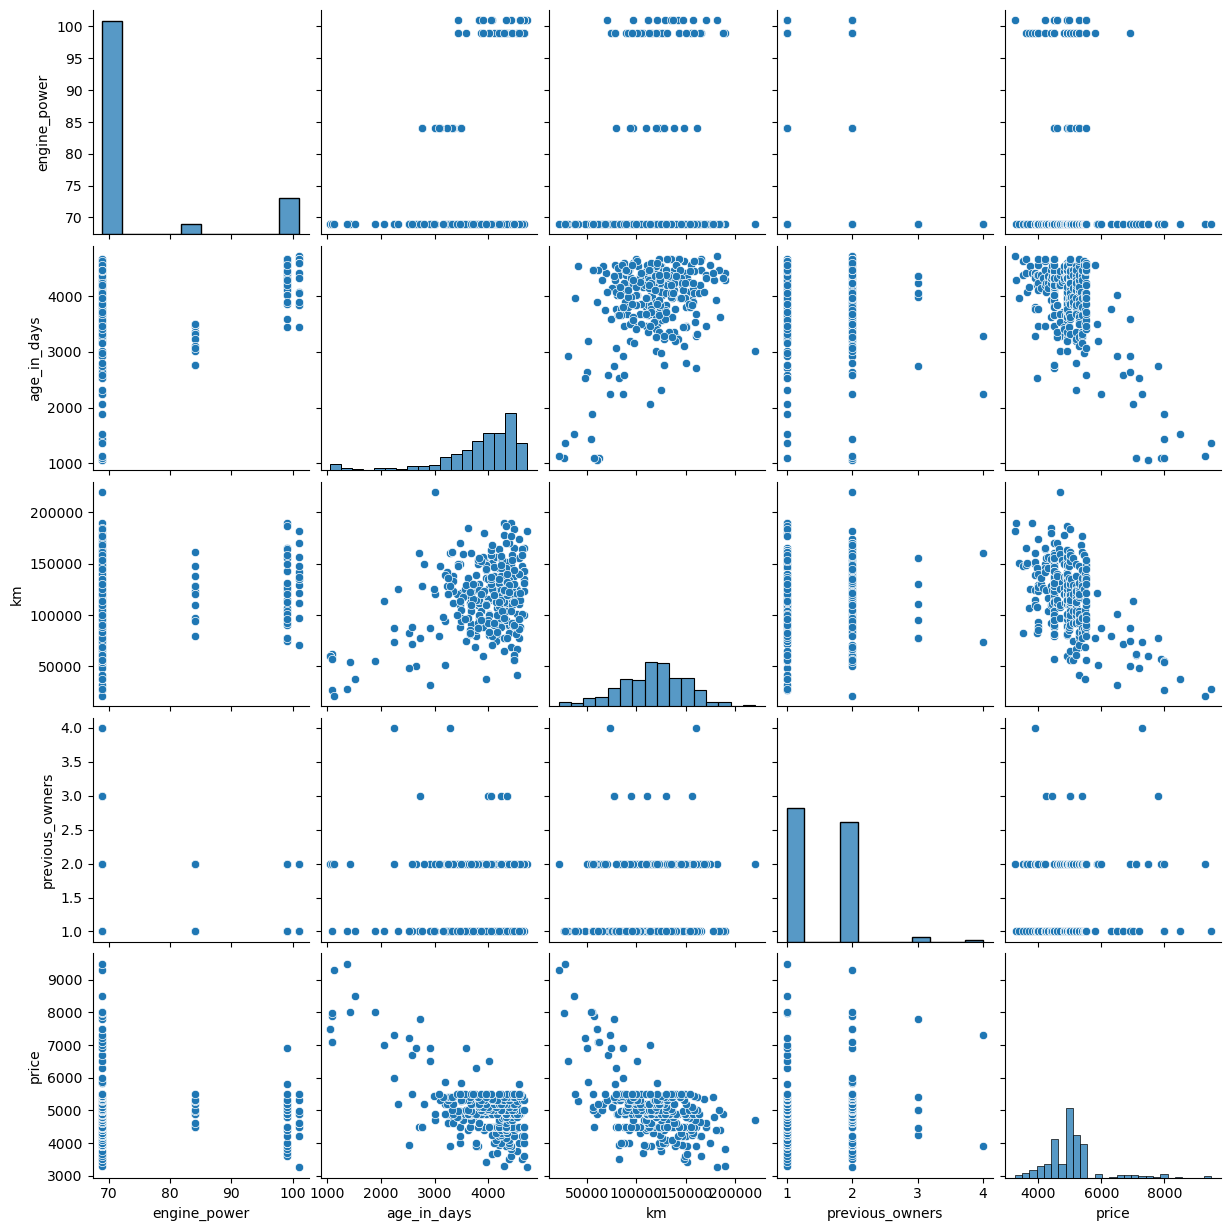

In [12]:
plt.figure(figsize=(15,10))
sns.pairplot(df_def)
plt.show()

### At this point, in order to see if a linear regression model is a good fit, we need to check the linearity assumption with a fitted values vs residuals plot:

In [13]:
import statsmodels.formula.api as smf
slr_model = smf.ols(formula = 'price~model+engine_power+age_in_days+km+previous_owners', data = df_def).fit()
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     71.32
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.63e-55
Time:                        17:42:41   Log-Likelihood:                -2429.1
No. Observations:                 314   AIC:                             4872.
Df Residuals:                     307   BIC:                             4898.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8614.1433    283.070     30.431      0.000    8057.140    9171.147
model[T.pop]     -161.1611     75.051     -2.147      0.033    -308.841     -13.481
model[T.sport]    -53.4368     87.273     -0.612      0.541    -225.166     118.293
engine_power        0.9334      3.106      0.300      0.764      -5.179       7.046
age_in_days        -0.6439      0.049    -13.171      0.000      -0.740      -0.548
km                 -0.0097      0.001     -9.383      0.000      -0.012      -0.008
previous_owners    12.4613     55.751      0.224      0.823     -97.242     122.164
==============================================================================
Omnibus:                       10.296   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               20.219
Skew:                           0.015   Prob(JB):                     4.07e-05
Kurtosis:                       4.243   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

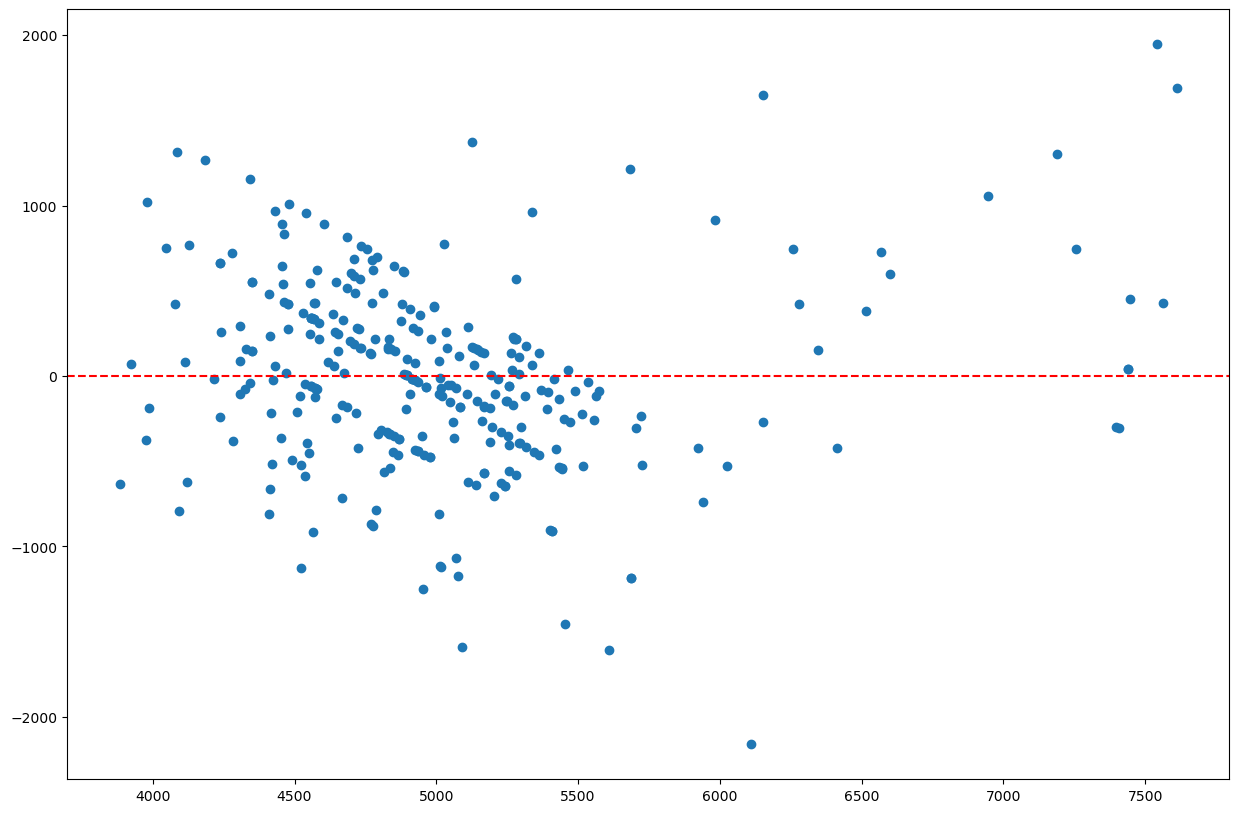

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(slr_model.fittedvalues, slr_model.resid)
plt.axhline(y=0,color='r',linestyle = '--')
plt.show()

### By drawing boxes on the fitted values vs residuals plot, we can see that the points are not scattered evenly, so the linearity assumption is not fully met.

### In order to meet the linearity assumption, we can transform some of our explanatory variables, for example we can "squash" larger values for the km and the age_in_days variables with a logarithmic transformation:

In [15]:
df_def['ln_age_in_days'] = np.log(df_def['age_in_days'])
df_def['ln_km'] = np.log(df_def['km'])
df_def

C:\Users\napan\AppData\Local\Temp\ipykernel_9596\303460806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['ln_age_in_days'] = np.log(df_def['age_in_days'])


,model,engine_power,transmission,age_in_days,km,previous_owners,price,ln_age_in_days,ln_km
0,pop,69,manual,4474,56779,2,4490,8.406038,10.946922
1,lounge,69,manual,2708,160000,1,4500,7.903966,11.982929
2,lounge,69,automatic,3470,170000,2,4500,8.151910,12.043554
3,sport,69,manual,3288,132000,2,4700,8.098035,11.790557
4,sport,69,manual,3712,124490,2,4790,8.219326,11.731981
...,...,...,...,...,...,...,...,...,...
375,lounge,69,manual,4474,55976,2,5500,8.406038,10.932678
376,lounge,69,manual,4200,134717,1,5500,8.342840,11.810932
377,lounge,69,manual,3470,113344,1,5500,8.151910,11.638183
378,pop,69,automatic,3712,130000,1,5500,8.219326,11.775290


### After the logarithmic transformation we can create a new fitted values vs residuals plot to check if the linearity assumption is met:

In [16]:
slr_model2 = smf.ols(formula = 'price~model+engine_power+ln_age_in_days+ln_km+previous_owners', data = df_def).fit()
slr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     87.18
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.37e-63
Time:                        17:42:42   Log-Likelihood:                -2410.0
No. Observations:                 314   AIC:                             4834.
Df Residuals:                     307   BIC:                             4860.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         3.05e+04   1154.836     26.415      0.000    2.82e+04    3.28e+04
model[T.pop]     -208.0817     70.477     -2.952      0.003    -346.760     -69.403
model[T.sport]    -77.6367     82.051     -0.946      0.345    -239.090      83.817
engine_power       -0.1850      2.910     -0.064      0.949      -5.911       5.541
ln_age_in_days  -1705.8547    135.398    -12.599      0.000   -1972.280   -1439.430
ln_km            -978.6471    101.012     -9.688      0.000   -1177.410    -779.884
previous_owners    16.2208     52.563      0.309      0.758     -87.208     119.650
==============================================================================
Omnibus:                        7.279   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               11.389
Skew:                          -0.077   Prob(JB):                      0.00337
Kurtosis:                       3.920   Cond. No.                     2.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

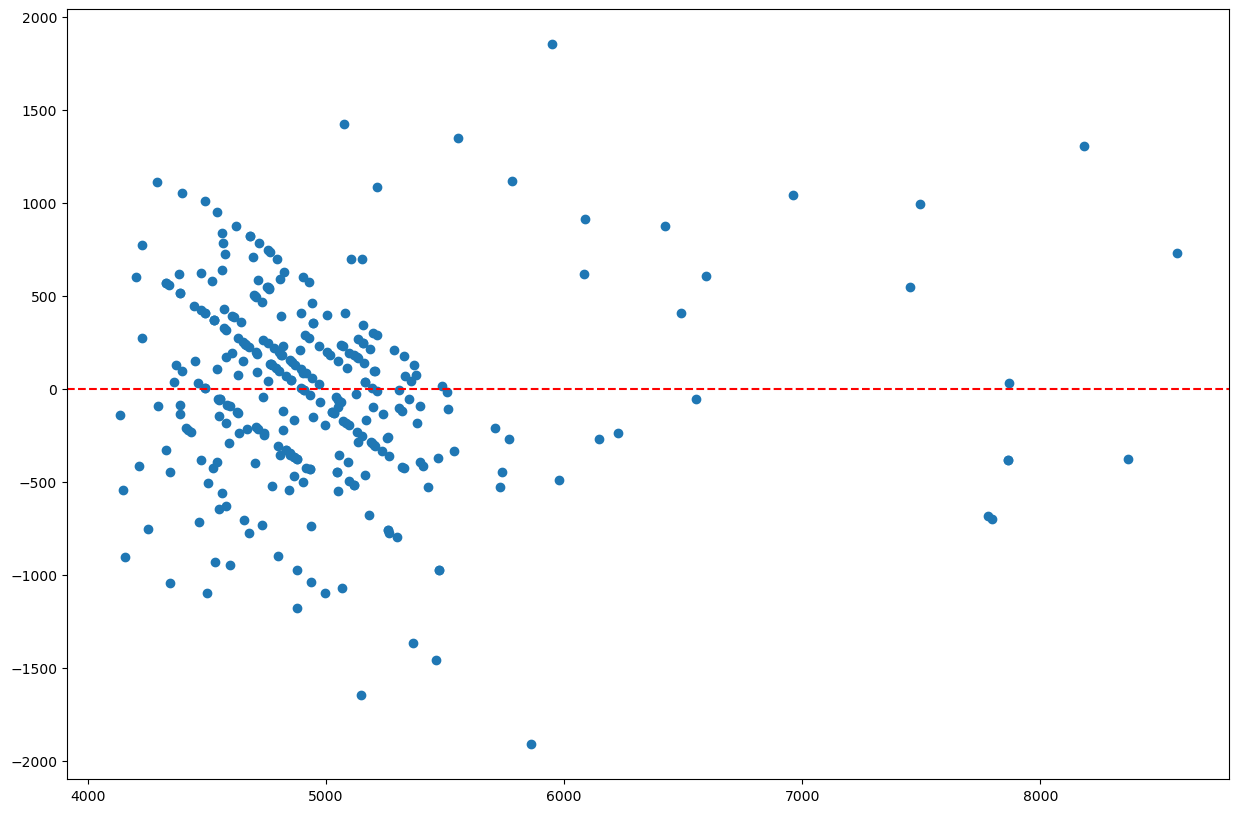

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(slr_model2.fittedvalues, slr_model2.resid)
plt.axhline(y=0,color='r',linestyle = '--')
plt.show()

### The points in the plot seem to be more evenly scattered, so the linearity assumption is met.

### The last step in our analysis involves interaction terms, so we can create a scatterplot for every explanatory numerical variable and our response variable with a best fit line for every distint value of our categorical variables:

<Figure size 1500x1000 with 0 Axes>

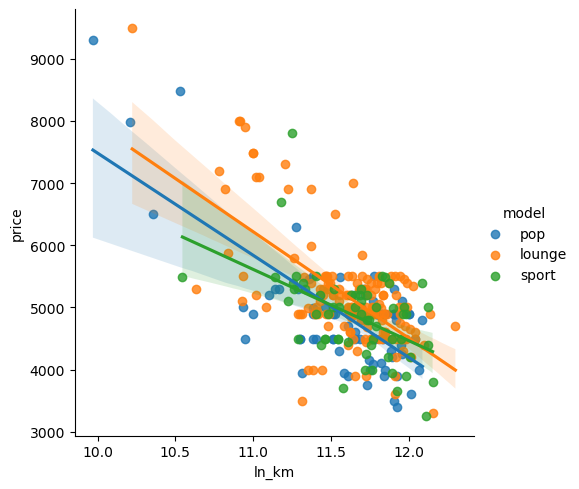

In [18]:
plt.figure(figsize=(15,10))
sns.lmplot(x='ln_km',y='price', hue='model', data = df_def)
plt.show()

### Looking at the scatterplot, we can determine that:
* All of the relationships are negative
* All of the relationships are linear
* The relationship between price and ln_km seems to be the same for model pop and model lounge, a little less steeper for model sport
* All of the relationships have at least one outlier
* The model sport slope is different the the other two
### Since the difference in the slopes is not that evident, the interaction effect is weak.

<Figure size 1500x1000 with 0 Axes>

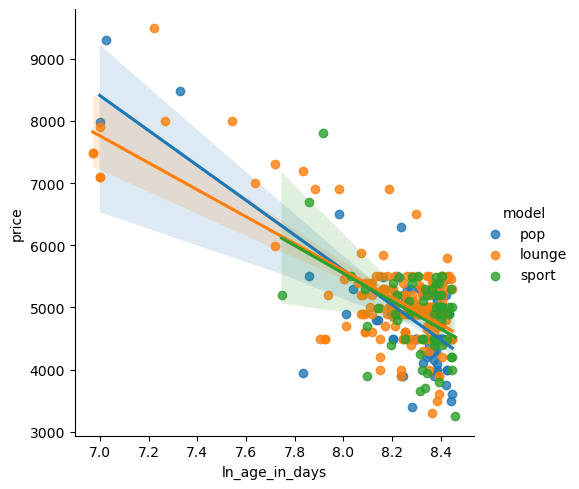

In [19]:
plt.figure(figsize=(15,10))
sns.lmplot(x='ln_age_in_days',y='price', hue='model', data = df_def)
plt.show()

###  Looking at the scatterplot, we can determine that:
* All of the relationships are negative
* All of the relationships are linear
* The relationship between price and ln age in days seems to be the same for model sport and model lounge, a little steeper for model pop
* All of the relationships have at least one outlier
* The model pop slope is different the the other two
### Since the difference in the slopes is not that evident, the interaction effect is weak.

<Figure size 1500x1000 with 0 Axes>

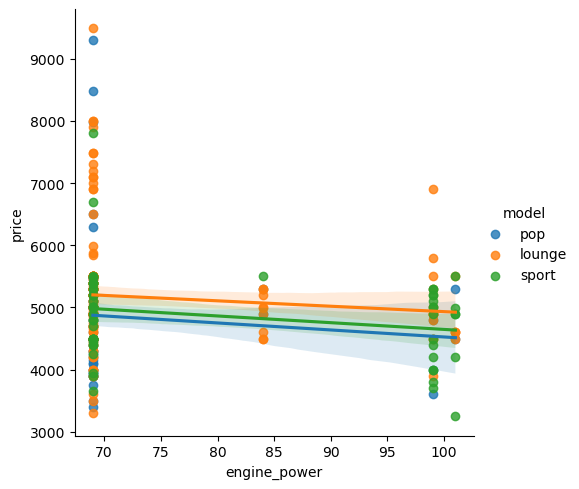

In [20]:
plt.figure(figsize=(15,10))
sns.lmplot(x='engine_power',y='price', hue='model', data = df_def)
plt.show()

###  Looking at the scatterplot, we can determine that:
* All of the relationships are negative
* All of the relationships are linear
* The relationship between price and engine power seems to be the same for every model
* All of the relationships have at least one outlier
* All the slopes look the same
### There is no interaction effect

<Figure size 1500x1000 with 0 Axes>

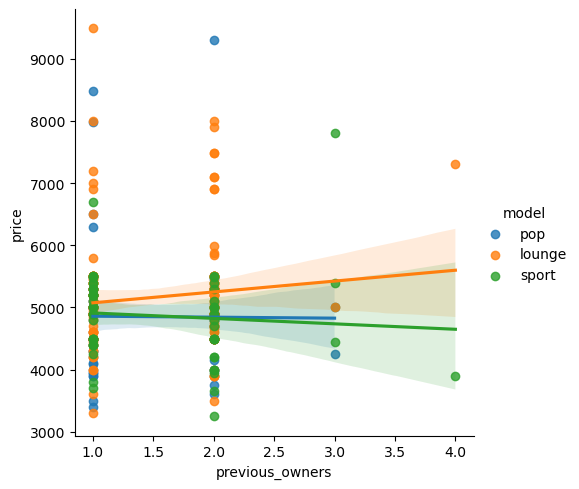

In [21]:
plt.figure(figsize=(15,10))
sns.lmplot(x='previous_owners',y='price', hue='model', data = df_def)
plt.show()

###  Looking at the scatterplot, we can determine that:
* The relationship between previous owners and price with model lounge is positive, the other two are negative
* All of the relationships are linear
* The relationship between price and previous owners seems to be the same for model pop and model sport, positive for model lounge
* All of the relationships have at least one outlier
* The model lounge slope is different the the other two
### Since the difference in the slopes is not that evident, the interaction effect is weak.

<Figure size 1500x1000 with 0 Axes>

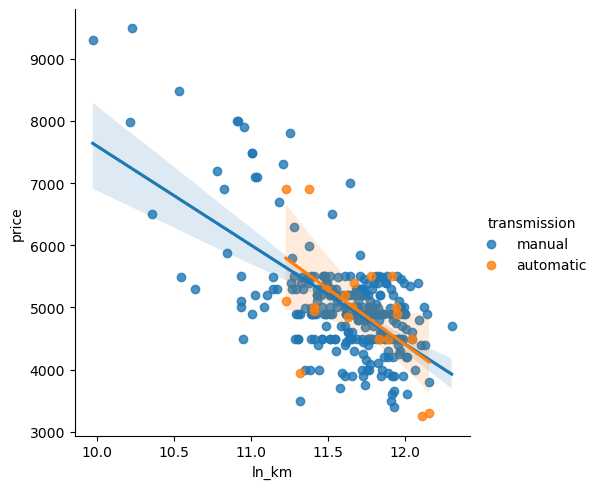

In [22]:
plt.figure(figsize=(15,10))
sns.lmplot(x='ln_km',y='price', hue='transmission', data = df_def)
plt.show()

###  Looking at the scatterplot, we can determine that:
* All of the relationships are negative
* All of the relationships are linear
* The relationship between price and ln_km seems to be the same for transmission manual and transmission automatic (a little steeper)
* All of the relationships have at least one outlier
* The two slopes are almost identical
### There is no interaction effect

<Figure size 1500x1000 with 0 Axes>

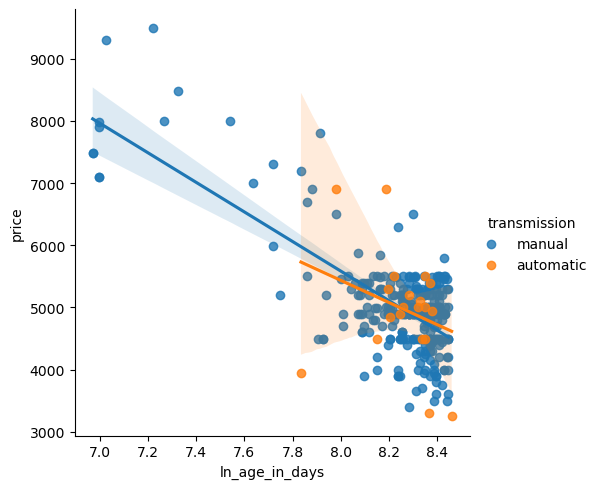

In [23]:
plt.figure(figsize=(15,10))
sns.lmplot(x='ln_age_in_days',y='price', hue='transmission', data = df_def)
plt.show()

### Looking at the scatterplot, we can determine that:
* All of the relationships are negative
* All of the relationships are linear
* The relationship between price and ln age in days seems to be the same for transmission manual and transmission automatic (a little less steeper)
* All of the relationships have at least one outlier
* The two slopes are almost identical
###  Since the difference in the slopes is not that evident, the interaction effect is weak.

<Figure size 1500x1000 with 0 Axes>

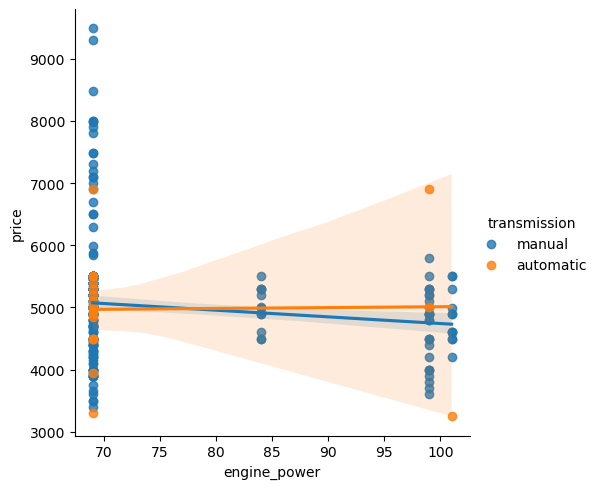

In [24]:
plt.figure(figsize=(15,10))
sns.lmplot(x='engine_power',y='price', hue='transmission', data = df_def)
plt.show()

###  Looking at the scatterplot, we can determine that:
* The relationship between price and engine power with automatic transmission is positive,the relationship with manual transmisssion is negative
* All of the relationships are linear
* The relationship between price and engine power is slightly positive for automatic
* All of the relationships have at least one outlier
* The slope for automatic is slightly different
### Since the difference in the slopes is not that evident, the interaction effect is weak.

<Figure size 1500x1000 with 0 Axes>

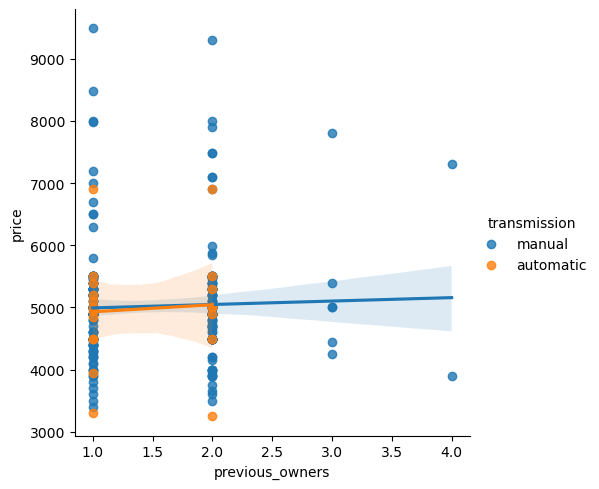

In [25]:
plt.figure(figsize=(15,10))
sns.lmplot(x='previous_owners',y='price', hue='transmission', data = df_def)
plt.show()

###  Looking at the scatterplot, we can determine that:
* All of the relationships are positive
* All of the relationships are linear
* The relationship between price and previous owners seems to be the same for every transmission
* All of the relationships have at least one outlier
* All the slopes look the same
### There is no interaction effect

## 5. Predictive Models

### Before fitting and testing our predictive models we have to create indicator variables for our categorical variables:

In [26]:
df_def2 = pd.get_dummies(df_def, drop_first=True, dtype = int)
df_def2

,engine_power,age_in_days,km,previous_owners,price,ln_age_in_days,ln_km,model_pop,model_sport,transmission_manual
0,69,4474,56779,2,4490,8.406038,10.946922,1,0,1
1,69,2708,160000,1,4500,7.903966,11.982929,0,0,1
2,69,3470,170000,2,4500,8.151910,12.043554,0,0,0
3,69,3288,132000,2,4700,8.098035,11.790557,0,1,1
4,69,3712,124490,2,4790,8.219326,11.731981,0,1,1
...,...,...,...,...,...,...,...,...,...,...
375,69,4474,55976,2,5500,8.406038,10.932678,0,0,1
376,69,4200,134717,1,5500,8.342840,11.810932,0,0,1
377,69,3470,113344,1,5500,8.151910,11.638183,0,0,1
378,69,3712,130000,1,5500,8.219326,11.775290,1,0,0


### After creating the indicator variables we can perform a train - test split on our dataset:

In [27]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_def2, test_size = 0.2, random_state = 100)
df_train

,engine_power,age_in_days,km,previous_owners,price,ln_age_in_days,ln_km,model_pop,model_sport,transmission_manual
128,69,4383,129800,1,4090,8.385489,11.773750,1,0,1
262,69,3684,119000,1,4990,8.211754,11.686879,0,0,1
161,69,3927,156000,2,4500,8.275631,11.957611,0,0,1
274,69,3623,119800,2,5000,8.195058,11.693579,1,0,1
331,69,3258,120000,2,5300,8.088869,11.695247,0,1,1
...,...,...,...,...,...,...,...,...,...,...
130,69,4322,126000,2,4150,8.371474,11.744037,1,0,1
117,69,2527,82000,1,3950,7.834788,11.314475,1,0,0
143,69,4474,92397,1,4400,8.406038,11.433850,0,1,1
345,69,3347,133000,2,5400,8.115820,11.798104,0,0,1


In [28]:
df_test

,engine_power,age_in_days,km,previous_owners,price,ln_age_in_days,ln_km,model_pop,model_sport,transmission_manual
224,101,4596,97000,1,4900,8.432942,11.482466,0,1,1
264,101,3439,147448,2,4990,8.142936,11.901231,0,1,1
142,69,4230,155000,1,4399,8.349957,11.951180,1,0,1
1,69,2708,160000,1,4500,7.903966,11.982929,0,0,1
282,69,4108,90000,2,5000,8.320692,11.407565,0,0,0
...,...,...,...,...,...,...,...,...,...,...
23,69,2527,48000,1,7200,7.834788,10.778956,0,0,1
139,69,4230,117000,1,4300,8.349957,11.669929,0,0,1
357,69,3957,38000,1,5490,8.283241,10.545341,0,1,1
370,69,4474,90000,1,5500,8.406038,11.407565,0,1,1


### In order to improve the slope's interpretability we can z-score scale our training dataset using the training dataset columns means and standard deviation:

In [29]:
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
scaled_expl_var = scaler_training.fit_transform(df_train[['engine_power','ln_age_in_days','ln_km','previous_owners']])
df_train[['engine_power','ln_age_in_days','ln_km','previous_owners']] = scaled_expl_var
df_train.head()

,engine_power,age_in_days,km,previous_owners,price,ln_age_in_days,ln_km,model_pop,model_sport,transmission_manual
128,-0.410891,4383,129800,-0.902473,4090,0.564489,0.444862,1,0,1
262,-0.410891,3684,119000,-0.902473,4990,-0.057544,0.184255,0,0,1
161,-0.410891,3927,156000,0.839994,4500,0.171158,0.996430,0,0,1
274,-0.410891,3623,119800,0.839994,5000,-0.117324,0.204355,1,0,1
331,-0.410891,3258,120000,0.839994,5300,-0.497519,0.209359,0,1,1


### Now we can z-score scale out test dataset by using the training dataset columns means and standard deviations:

In [30]:
scaled_expl_var2 = scaler_training.transform(df_test[['engine_power','ln_age_in_days','ln_km','previous_owners']])
df_test[['engine_power','ln_age_in_days','ln_km','previous_owners']] = scaled_expl_var2
df_test.head()

,engine_power,age_in_days,km,previous_owners,price,ln_age_in_days,ln_km,model_pop,model_sport,transmission_manual
224,2.729241,4596,97000,-0.902473,4900,0.734387,-0.428965,0,1,1
264,2.729241,3439,147448,0.839994,4990,-0.303939,0.827294,0,1,1
142,-0.410891,4230,155000,-0.902473,4399,0.437273,0.977138,1,0,1
1,-0.410891,2708,160000,-0.902473,4500,-1.159540,1.072381,0,0,1
282,-0.410891,4108,90000,0.839994,5000,0.332491,-0.653663,0,0,0


### We can now fit a non regularized linear regression model using our explanatory variables:

In [31]:
import statsmodels.formula.api as smf
slr_model = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop+model_sport+transmission_manual', data=df_train).fit()
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     64.13
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.07e-51
Time:                        17:42:46   Log-Likelihood:                -1931.9
No. Observations:                 251   AIC:                             3880.
Df Residuals:                     243   BIC:                             3908.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5071.7924    136.851     37.061      0.000    4802.226    5341.359
engine_power            4.0124     36.149      0.111      0.912     -67.193      75.218
ln_age_in_days       -470.0283     41.811    -11.242      0.000    -552.387    -387.670
ln_km                -328.9390     41.247     -7.975      0.000    -410.187    -247.691
previous_owners       -11.4009     34.510     -0.330      0.741     -79.377      56.576
model_pop            -240.3815     79.841     -3.011      0.003    -397.651     -83.112
model_sport          -161.0650     99.423     -1.620      0.107    -356.905      34.775
transmission_manual    45.0407    142.524      0.316      0.752    -235.700     325.781
==============================================================================
Omnibus:                        5.020   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.033
Skew:                          -0.241   Prob(JB):                       0.0808
Kurtosis:                       3.499   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The test dataset R^2 is:

In [32]:
from sklearn.metrics import r2_score
y_test = df_test['price']
y_pred_test = slr_model.predict(df_test)
r2_score(y_test,y_pred_test)

0.47555538278060994

### After this we can create a new non regularized model that also uses the interaction terms we detected previously, since we didn't detect any strong interaction terms we don't need to create a new model with interaction terms.

In [33]:
slr_model2 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop+model_sport+transmission_manual', data=df_train).fit()
y_test2 = df_test['price']
y_pred_test2 = slr_model2.predict(df_test)
r2_score(y_test2,y_pred_test2)

0.47555538278060994

### Our goal is to find the model with the highest test R^2, so we use a backward elimination algorithm starting from our regression model with all the explanatory variables:

In [34]:
slr_model2 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop+model_sport+transmission_manual', data=df_train).fit()
y_test2 = df_test['price']
y_pred_test2 = slr_model2.predict(df_test)
r2_score(y_test2,y_pred_test2)

0.47555538278060994

In [35]:
slr_model3 = smf.ols(formula='price~ln_age_in_days+ln_km+previous_owners+model_pop+model_sport+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.4760921815069944

In [36]:
slr_model3 = smf.ols(formula='price~engine_power+ln_km+previous_owners+model_pop+model_sport+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.206857509368771

In [37]:
slr_model3 = smf.ols(formula='price~engine_power+ln_age_in_days+previous_owners+model_pop+model_sport+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.17022948459609977

In [38]:
slr_model3 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+model_pop+model_sport+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.4804186895602639

In [39]:
slr_model3 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_sport+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.4882572147973079

In [40]:
slr_model3 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.5041574520903276

In [41]:
slr_model3 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop+model_sport', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.4784424529150566

### Highest model:

In [42]:
slr_model3 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop+transmission_manual', data=df_train).fit()
y_test3 = df_test['price']
y_pred_test3 = slr_model3.predict(df_test)
r2_score(y_test3,y_pred_test3)

0.5041574520903276

In [43]:
slr_model4 = smf.ols(formula='price~ln_age_in_days+ln_km+previous_owners+model_pop+transmission_manual', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.5045999991760963

In [44]:
slr_model4 = smf.ols(formula='price~engine_power+ln_km+previous_owners+model_pop+transmission_manual', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.19114941673325303

In [45]:
slr_model4 = smf.ols(formula='price~engine_power+ln_age_in_days+previous_owners+model_pop+transmission_manual', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.25061695100849146

In [46]:
slr_model4 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+model_pop+transmission_manual', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.5096571738229922

In [47]:
slr_model4 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+transmission_manual', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.5018380524722823

In [48]:
slr_model4 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+previous_owners+model_pop', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.5048634570036317

### Highest:

In [49]:
slr_model4 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+model_pop+transmission_manual', data=df_train).fit()
y_test4 = df_test['price']
y_pred_test4 = slr_model4.predict(df_test)
r2_score(y_test4,y_pred_test4)

0.5096571738229922

In [50]:
slr_model5 = smf.ols(formula='price~ln_age_in_days+ln_km+model_pop+transmission_manual', data=df_train).fit()
y_test5 = df_test['price']
y_pred_test5 = slr_model5.predict(df_test)
r2_score(y_test5,y_pred_test5)

0.5102703498104311

In [51]:
slr_model5 = smf.ols(formula='price~engine_power+ln_km+model_pop+transmission_manual', data=df_train).fit()
y_test5 = df_test['price']
y_pred_test5 = slr_model5.predict(df_test)
r2_score(y_test5,y_pred_test5)

0.17044389741347266

In [52]:
slr_model5 = smf.ols(formula='price~engine_power+ln_age_in_days+model_pop+transmission_manual', data=df_train).fit()
y_test5 = df_test['price']
y_pred_test5 = slr_model5.predict(df_test)
r2_score(y_test5,y_pred_test5)

0.2588797947304017

In [53]:
slr_model5 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+transmission_manual', data=df_train).fit()
y_test5 = df_test['price']
y_pred_test5 = slr_model5.predict(df_test)
r2_score(y_test5,y_pred_test5)

0.5065898520787192

In [54]:
slr_model5 = smf.ols(formula='price~engine_power+ln_age_in_days+ln_km+model_pop', data=df_train).fit()
y_test5 = df_test['price']
y_pred_test5 = slr_model5.predict(df_test)
r2_score(y_test5,y_pred_test5)

0.5102199602638879

### Highest:

In [55]:
slr_model5 = smf.ols(formula='price~ln_age_in_days+ln_km+model_pop+transmission_manual', data=df_train).fit()
y_test5 = df_test['price']
y_pred_test5 = slr_model5.predict(df_test)
r2_score(y_test5,y_pred_test5)

0.5102703498104311

In [56]:
slr_model6 = smf.ols(formula='price~ln_km+model_pop+transmission_manual', data=df_train).fit()
y_test6 = df_test['price']
y_pred_test6 = slr_model6.predict(df_test)
r2_score(y_test6,y_pred_test6)

0.1705647488797567

In [57]:
slr_model6 = smf.ols(formula='price~ln_age_in_days+model_pop+transmission_manual', data=df_train).fit()
y_test6 = df_test['price']
y_pred_test6 = slr_model6.predict(df_test)
r2_score(y_test6,y_pred_test6)

0.2568204575001345

In [58]:
slr_model6 = smf.ols(formula='price~ln_age_in_days+ln_km+transmission_manual', data=df_train).fit()
y_test6 = df_test['price']
y_pred_test6 = slr_model6.predict(df_test)
r2_score(y_test6,y_pred_test6)

0.506326330541372

In [59]:
slr_model6 = smf.ols(formula='price~ln_age_in_days+ln_km+model_pop', data=df_train).fit()
y_test6 = df_test['price']
y_pred_test6 = slr_model6.predict(df_test)
r2_score(y_test6,y_pred_test6)

0.5107826828964233

### Highest:

In [60]:
slr_model6 = smf.ols(formula='price~ln_age_in_days+ln_km+model_pop', data=df_train).fit()
y_test6 = df_test['price']
y_pred_test6 = slr_model6.predict(df_test)
r2_score(y_test6,y_pred_test6)

0.5107826828964233

In [61]:
slr_model7 = smf.ols(formula='price~ln_km+model_pop', data=df_train).fit()
y_test7 = df_test['price']
y_pred_test7 = slr_model7.predict(df_test)
r2_score(y_test7,y_pred_test7)

0.17146387718067468

In [62]:
slr_model7 = smf.ols(formula='price~ln_age_in_days+model_pop', data=df_train).fit()
y_test7 = df_test['price']
y_pred_test7 = slr_model7.predict(df_test)
r2_score(y_test7,y_pred_test7)

0.2711248832089246

In [63]:
slr_model7 = smf.ols(formula='price~ln_age_in_days+ln_km', data=df_train).fit()
y_test7 = df_test['price']
y_pred_test7 = slr_model7.predict(df_test)
r2_score(y_test7,y_pred_test7)

0.505386394576609

### Best model:

In [64]:
slr_model6 = smf.ols(formula='price~ln_age_in_days+ln_km+model_pop', data=df_train).fit()
slr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     149.4
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           3.24e-55
Time:                        17:42:53   Log-Likelihood:                -1933.4
No. Observations:                 251   AIC:                             3875.
Df Residuals:                     247   BIC:                             3889.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5073.0154     40.806    124.319      0.000    4992.643    5153.388
ln_age_in_days  -475.0449     40.842    -11.631      0.000    -555.488    -394.602
ln_km           -333.9519     40.780     -8.189      0.000    -414.273    -253.631
model_pop       -197.8382     75.048     -2.636      0.009    -345.654     -50.022
==============================================================================
Omnibus:                        5.058   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                5.039
Skew:                          -0.246   Prob(JB):                       0.0805
Kurtosis:                       3.490   Cond. No.                         2.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y_pred_test6 = slr_model6.predict(df_test)
r2_score(y_test6,y_pred_test6)

0.5107826828964233

## 6. Best Model Discussion

### We found the best model, its equation is:

price^ = 5073.0154-475.0449ln_age_in_days-333.9519ln_km-197.8382model_pop

### The model has a test R^2 of 0.5107826828964233, which is pretty decent, it's not a bad fit. This "best model" doesn't include some of our original explanatory variables like: engine power, model lounge, model sport and transmission manual, they were overfitting the model. With our final model we can now check if there are issues with multicollinearity:

In [66]:
df_train[['ln_age_in_days','ln_km','model_pop']].corr()

,ln_age_in_days,ln_km,model_pop
ln_age_in_days,1.000000,0.542230,0.071242
ln_km,0.542230,1.000000,-0.045324
model_pop,0.071242,-0.045324,1.000000


### The minimum correlation coefficient for multicollinearity is 0.7, in this case every correlation is below that value, so there are no issues.

### Since we scaled the explanatory variables before the analysis we can also interpret the slopes of the variables: by looking at the slope's absolute values we can see that the most important variable is ln_age_in_days, followed by ln_km and model_pop.

## 7. Conclusion

### The final "best model" seems to be a good fit, with a decent test R^2 and no multicollinearity issues. It could be used to predict the average price of a used model of Fiat 500 car with a determined age in days and the number of kilometers travelled by the car.

### The "best model" that we found might not have the highest possible test R^2 out of all possible models, this "best model" just has a high enough test R^2 starting from our full model. Using our train and test dataset we might want to create a feature matrix ad a target array in order to permor some other analysis using regularized models like Lasso, Ridge or ElasticNet regressions.

### In the analysis we decided to delete some rows containing outliers, so the dataset is not fully representative, but the dataset also contains some outliers, especially regarding the prices of the used cars, so the results might be skewed.

### The next step in the analysis might be improving the model by looking for a model with a higher test R^2 by using regularized models, in order to improve the prediction's accuracy.